## 데이터 로드

In [8]:
import os
import warnings.filterwarnings('ignore')

from glob import glob
import numpy as np
import PIL
from PIL import Image

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = 'cpu'

In [18]:
path = './data/train/'

train_images = []
train_idx = []

for filename in glob(path + "*"):
    for img in glob(filename + '/*.jpg'):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        train_images.append(img_array)
        label = filename.split('\\')[-1]
        train_idx.append(label)
        
train_images = np.array(train_images)
train_idx = np.array(train_idx)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_idx = le.fit_transform(train_idx)
train_idx = train_idx.reshape(-1 ,1)

print(train_images.shape)
print(train_idx.shape)

(50000, 32, 32, 3)
(50000, 1)


In [19]:
path = './data/test/'

test_images = []
test_idx = []

first = sorted(glob(path + '*.jpg'))

for filename in first:
    an_img = PIL.Image.open(filename)
    img_array = np.array(an_img)
    test_images.append(img_array)
    
    label = filename.split('\\')[-1]
    test_idx.append(label)
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],

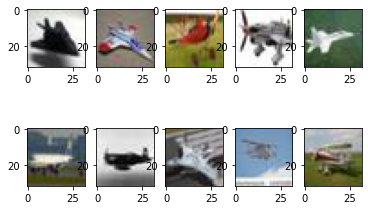

In [20]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    print(train_labels[i], end = ',')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

test = test_images

In [22]:
print('X_tr 크기 : ', X_tr.shape)
print('X_val 크기 : ', X_val.shape)
print('test 크기 : ', test.shape)

X_tr 크기 :  (40000, 32, 32, 3)
X_val 크기 :  (10000, 32, 32, 3)
test 크기 :  (10000, 32, 32, 3)


In [23]:
X_tr = X_tr / 255.0
X_val = X_val / 255.0
test = test / 255.0

In [24]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'SAME', input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2, padding = 'SAME'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding = 'SAME'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding = 'SAME'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)         

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 50, batch_size = 128)

Epoch 1/50
313/313 [==============================] - 43s 134ms/step - loss: 1.7540 - accuracy: 0.3536 - val_loss: 1.5094 - val_accuracy: 0.4553
Epoch 2/50
313/313 [==============================] - 41s 131ms/step - loss: 1.4669 - accuracy: 0.4656 - val_loss: 1.3675 - val_accuracy: 0.5062
Epoch 3/50
313/313 [==============================] - 39s 126ms/step - loss: 1.3514 - accuracy: 0.5106 - val_loss: 1.3306 - val_accuracy: 0.5157
Epoch 4/50
313/313 [==============================] - 35s 112ms/step - loss: 1.2783 - accuracy: 0.5378 - val_loss: 1.1539 - val_accuracy: 0.5955
Epoch 5/50
313/313 [==============================] - 42s 136ms/step - loss: 1.2221 - accuracy: 0.5612 - val_loss: 1.1211 - val_accuracy: 0.6058
Epoch 6/50
313/313 [==============================] - 41s 131ms/step - loss: 1.1759 - accuracy: 0.5762 - val_loss: 1.0624 - val_accuracy: 0.6259
Epoch 7/50
313/313 [==============================] - 35s 111ms/step - loss: 1.1326 - accuracy: 0.5972 - val_loss: 1.0443 - val_ac

In [28]:
pred_proba = model.predict(test)

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['horse', 'bird', 'airplane', 'horse', 'airplane'], dtype='<U10')

In [29]:
import pandas as pd

submission = pd.read_csv('./data/sample_submission.csv')

submission['target'] = pred_class
submission.to_csv('Baseline.csv', index = False)

In [30]:
submission

,id,target
0,0000.jpg,horse
1,0001.jpg,bird
2,0002.jpg,airplane
3,0003.jpg,horse
4,0004.jpg,airplane
...,...,...
9995,9995.jpg,dog
9996,9996.jpg,dog
9997,9997.jpg,deer
9998,9998.jpg,automobile
